<a href="https://colab.research.google.com/github/Samiha9864/CVPR/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# 2. Load MNIST dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape for CNN
x_train = np.expand_dims(x_train, -1)  # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# 3. Build Model

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 4. Train

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# 5. Evaluate

loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


# 6. Save Model

model.save('/content/drive/MyDrive/mnist_model.h5')

print("✅ Model saved as mnist_model.h5")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 51s 58ms/step - accuracy: 0.8890 - loss: 0.3684 - val_accuracy: 0.9860 - val_loss: 0.0518
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9835 - loss: 0.0504 - val_accuracy: 0.9882 - val_loss: 0.0392
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 87s 61ms/step - accuracy: 0.9891 - loss: 0.0352 - val_accuracy: 0.9893 - val_loss: 0.0334
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.9922 - loss: 0.0237 - val_accuracy: 0.9870 - val_loss: 0.0437
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9863 - val_loss: 0.0544
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.9952 - loss: 0.0147 - val_accuracy: 0.9922 - val_loss: 0.0327
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9967 - loss: 0.0100 - val_accuracy: 0.9903 - val_loss: 0.0397
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9970 - loss: 0.0091 - 

Test Accuracy: 99.13%
✅ Model saved as mnist_model.h5


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=15,
                    validation_data=(x_test, y_test))


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9936 - loss: 0.0188 - val_accuracy: 0.9918 - val_loss: 0.0311
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9979 - loss: 0.0068 - val_accuracy: 0.9898 - val_loss: 0.0386
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9980 - loss: 0.0066 - val_accuracy: 0.9889 - val_loss: 0.0377
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9976 - loss: 0.0065 - val_accuracy: 0.9914 - val_loss: 0.0335
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9986 - loss: 0.0044 - val_accuracy: 0.9896 - val_loss: 0.0456
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9899 - val_loss: 0.0479
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9984 - loss: 0.0049 - val_accuracy: 0.9903 - val_loss: 0.0495
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9992 -

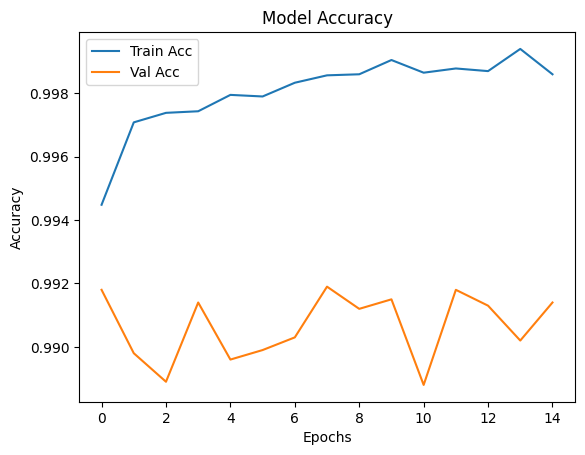

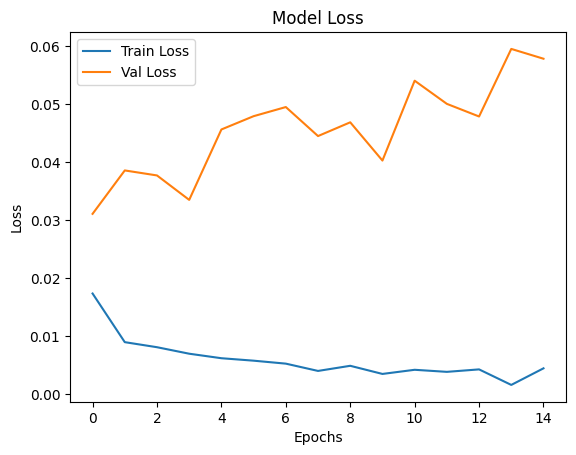

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


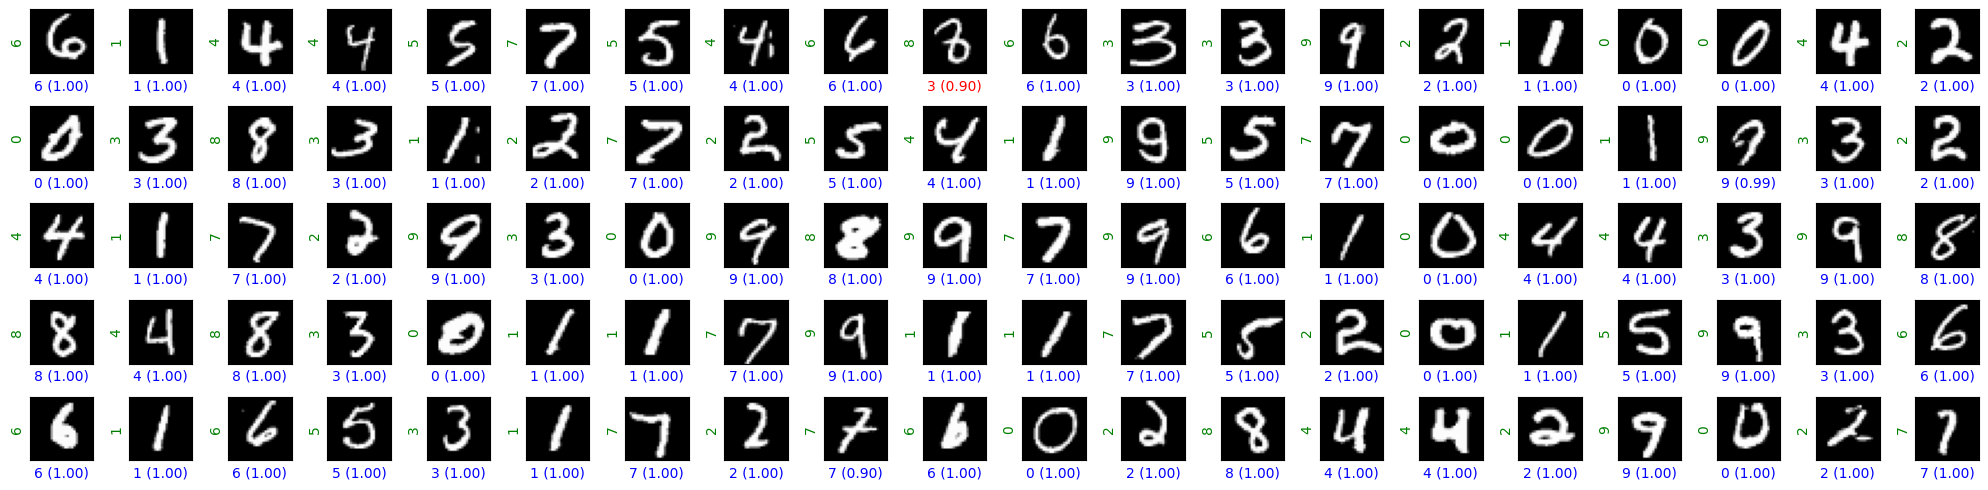

In [ ]:

# Make predictions
import random
ROWS = 5
COLS = 20
random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]

predictions = model.predict(sample_images)

# Plot results
plt.figure(figsize=(20, 5))
i = 0
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])

        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]

        # Label with prediction + confidence
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence:.2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence:.2f})", color='r')

        # True label on Y-axis
        plt.ylabel(sample_labels[i], color='g')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
def test(i):
    img = x_test[i]

    # reshape for prediction
    predictions = model.predict(img.reshape(1, 28, 28, 1), verbose=0)

    plt.figure()
    plt.imshow(img, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    # True label
    plt.ylabel(f"True Label: {y_test[i]}", color='g')

    # Prediction
    prediction = np.argmax(predictions)
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"Prediction = {prediction} (Confidence = {confidence:.2f})", color='b')
    else:
        plt.xlabel(f"Prediction = {prediction} (Confidence = {confidence:.2f})", color='r')
    plt.show()

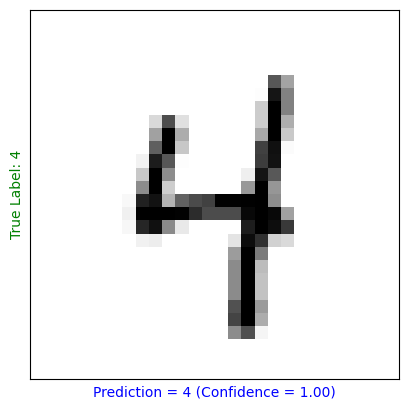

In [ ]:
test(19)

Starting webcam... Please allow camera access when prompted.


<IPython.core.display.Javascript object>

Predicted digit: 5 with confidence: 100.00%


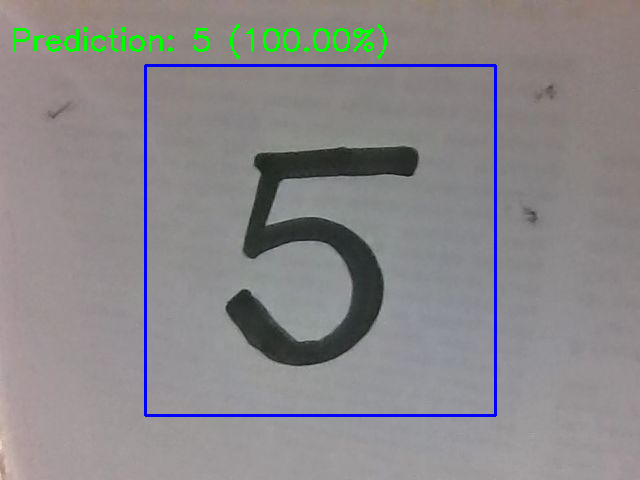

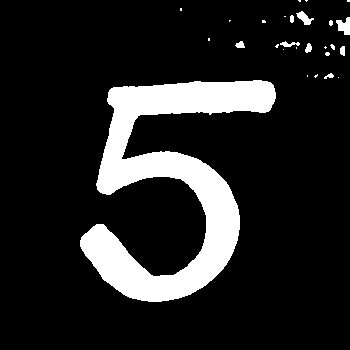

Predicted digit: 3 with confidence: 29.95%


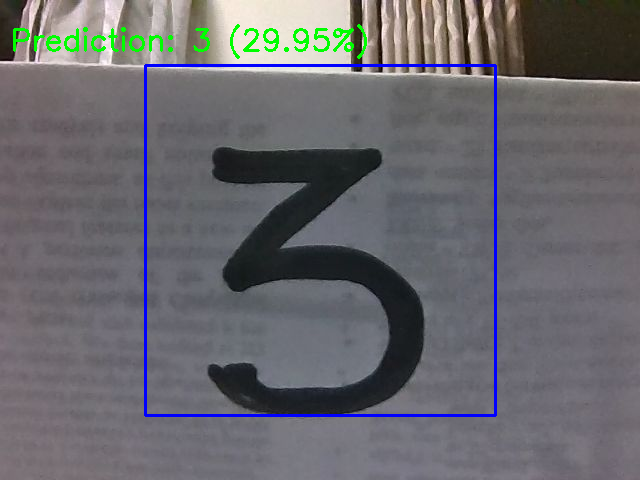

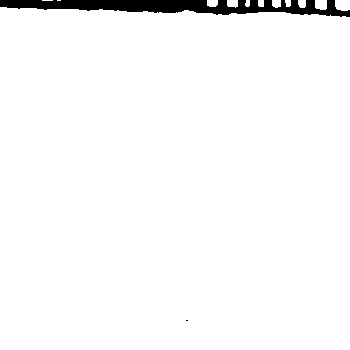

Webcam stopped


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import io
import PIL.Image
import time

# Load saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/mnist_model.h5')

# Prediction function
def predict_digit(img):
    img = cv2.resize(img, (28, 28))
    img = img.reshape(1, 28, 28, 1)
    img = img.astype("float32") / 255.0
    pred = model.predict(img, verbose=0)
    return np.argmax(pred), np.max(pred)

# JavaScript to create webcam video and capture frame
def create_webcam_video():
    js = Javascript('''
    async function createWebcam() {
        const video = document.createElement('video');
        video.style.width = '640px';
        video.style.height = '480px';
        video.setAttribute('playsinline', '');
        video.setAttribute('autoplay', '');

        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;

        const container = document.createElement('div');
        container.appendChild(video);
        document.body.appendChild(container);

        // Create capture button
        const captureBtn = document.createElement('button');
        captureBtn.textContent = 'Capture and Predict';
        captureBtn.style.margin = '10px';
        document.body.appendChild(captureBtn);

        // Create quit button
        const quitBtn = document.createElement('button');
        quitBtn.textContent = 'Quit';
        quitBtn.style.margin = '10px';
        document.body.appendChild(quitBtn);

        await new Promise((resolve) => {
            video.onloadedmetadata = () => {
                resolve();
            };
        });

        video.play();

        return new Promise((resolve) => {
            captureBtn.onclick = () => {
                const canvas = document.createElement('canvas');
                canvas.width = video.videoWidth;
                canvas.height = video.videoHeight;
                canvas.getContext('2d').drawImage(video, 0, 0);
                const data = canvas.toDataURL('image/jpeg', 0.8);
                resolve(data);
            };

            quitBtn.onclick = () => {
                stream.getTracks().forEach(track => track.stop());
                container.remove();
                captureBtn.remove();
                quitBtn.remove();
                resolve(null);
            };
        });
    }
    ''')
    display(js)

# Function to convert data URL to OpenCV image
def data_url_to_cv2_img(data_url):
    # Decode base64 image
    data = data_url.split(',')[1]
    binary = b64decode(data)

    # Convert to PIL Image
    img = PIL.Image.open(io.BytesIO(binary))

    # Convert to numpy array (OpenCV format)
    img = np.array(img)

    # Convert RGB to BGR (OpenCV uses BGR)
    img = img[:, :, ::-1].copy()

    return img

# Main function
def main():
    print("Starting webcam... Please allow camera access when prompted.")
    create_webcam_video()

    while True:
        # Get frame from webcam
        data_url = eval_js('createWebcam()')

        if data_url is None:
            print("Webcam stopped")
            break

        # Convert to OpenCV image
        frame = data_url_to_cv2_img(data_url)

        # Frame shape
        h, w, _ = frame.shape

        # ROI (blue box)
        box_size = 350
        x1 = w // 2 - box_size // 2
        y1 = h // 2 - box_size // 2
        x2 = w // 2 + box_size // 2
        y2 = h // 2 + box_size // 2

        # Rectangle
        frame_with_rect = frame.copy()
        cv2.rectangle(frame_with_rect, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # ROI
        roi = frame[y1:y2, x1:x2]

        # Grayscale + Gaussian Blur + Threshold
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thres = cv2.threshold(blur, 128, 255, cv2.THRESH_BINARY_INV)

        # Prediction
        digit, acc = predict_digit(thres)

        # Add prediction to frame
        cv2.putText(frame_with_rect, f"Prediction: {digit} ({acc*100:.2f}%)",
                    (10, 50), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 255, 0), 2)

        # Display frames
        print(f"Predicted digit: {digit} with confidence: {acc*100:.2f}%")
        cv2_imshow(frame_with_rect)
        cv2_imshow(thres)

        # Wait for a moment before next capture
        time.sleep(1)

# Run the main function
if __name__ == "__main__":
    main()
